In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import string
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
import itertools
import datetime
from nltk.corpus import wordnet
from wordcloud import WordCloud
import calendar
from nltk.util import ngrams

In [3]:
# Load the dataset
df = pd.read_csv("EDA/QA_data_finance2022_GK.csv")

In [4]:
# Get the number of rows and columns
num_rows = df.shape[0]
num_cols = df.shape[1]

print("Number of rows:", num_rows)
print("Number of columns:", num_cols)

Number of rows: 57
Number of columns: 3


In [5]:
df.head(5)

,source,Question,Answer
0,https://cals.ncsu.edu/news/you-decide-are-ther...,What is inflation?,Inflation is the average increase in the price...
1,https://cals.ncsu.edu/news/you-decide-are-ther...,Why is everyone concerned about inflation?,Inflation increases the cost of living. If you...
2,https://cals.ncsu.edu/news/you-decide-are-ther...,What has caused the increase in the inflation ...,There are two reasons. First is continuing pro...
3,https://cals.ncsu.edu/news/you-decide-are-ther...,Can’t the government simply control price chan...,"Forty years ago, price controls were imposed b..."
4,https://cals.ncsu.edu/news/you-decide-are-ther...,Some argue increased government spending would...,Government spending that increases the supply ...


In [6]:
df.tail(5)

,source,Question,Answer
52,https://www.betterup.com/blog/will-i-lose-my-j...,What to do if you’re laid off?,No job is recession-proof. Despite your best e...
53,https://www.betterup.com/blog/will-i-lose-my-j...,How do interest rates impact the economy?,"When interest rates fall, that tells you econo..."
54,https://www.bmo.com/main/personal/investments/...,Why you need to find your investment strategy?,It’s more important now than ever to develop—o...
55,https://www.bmo.com/main/personal/investments/...,How much attention should investors be paying ...,The stock market acts as a leading indicator f...
56,https://www.bmo.com/main/personal/investments/...,What economic factors should investors focus on?,If investors want to focus one single indicato...


In [7]:
df.shape

(57, 3)

In [8]:
df.columns

Index(['source', 'Question', 'Answer'], dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57 entries, 0 to 56
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   source    57 non-null     object
 1   Question  57 non-null     object
 2   Answer    57 non-null     object
dtypes: object(3)
memory usage: 1.5+ KB


In [10]:
df.describe()

,source,Question,Answer
count,57,57,57
unique,15,57,57
top,https://cals.ncsu.edu/news/you-decide-are-ther...,What is inflation?,Inflation is the average increase in the price...
freq,8,1,1


In [11]:
# no missing values
df.isnull().sum()

source      0
Question    0
Answer      0
dtype: int64

In [12]:
# count the number of unique values in each column: all unique values
df.nunique()

source      15
Question    57
Answer      57
dtype: int64

In [13]:
df.loc[:,"Question"][1]

'Why is everyone concerned about inflation? '

## Text cleaning

In [14]:
df_cleaned = df.copy()

In [15]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('omw-1.4')

import re
from nltk import word_tokenize, pos_tag
def get_wordnet_tag(tag):
    
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN
    
#For example, if the input tag is 'ADJ', the function will return 'j'. 
#This indicates that the word in question is an adjective in WordNet.

def lemmatize_text(title):
    stop = stopwords.words('english')
    lemmatizer = WordNetLemmatizer()

    words = list()
    title = word_tokenize(title)
    for word, tag in pos_tag(title):
        tag = get_wordnet_tag(tag)
        word = lemmatizer.lemmatize(word, tag)
        if word not in stop:
            words.append(word)
    
    return ' '.join(words)

import re
from nltk import word_tokenize, pos_tag

def clean_text(text):
    
    # Skip cleaning if the input is not a string
    if not isinstance(text, str):
        return text
    
    # Lowercase the text
    text = text.lower()

    # Replace URLs with the word 'link'
    pattern_link = r'https?://[^\s]+|www\.[^\s]+|[^\s]+\.com[^\s]*|[^\s]+\.org[^\s]*|[^\s]+\.html[^\s]*'
    text = re.sub(pattern_link, ' link ', text)

    # Remove punctuation
    #pattern_punctuation = r'[' + string.punctuation + '’]'
    #text = re.sub(pattern_punctuation, '', text)

    # Remove numbers that are not surrounded by words
    text = re.sub(r'(?<=\b)\d+(?=\b)', '', text)

    # Remove non-alphanumeric characters
    text = re.sub(r'[^\w\d\s]+', '', text)

    # Lemmatize the text using your lemmatize_text function
    text = lemmatize_text(text)

    # Remove multiple consecutive spaces
    text = re.sub(r'\s+', ' ', text)

    return text

def clean_text_column(dataset, column_name):
    new_column_name = column_name + "_cleaned"
    dataset[new_column_name] = dataset[column_name].apply(clean_text)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\garim\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\garim\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\garim\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\garim\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\garim\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [16]:
clean_text_column(df_cleaned, 'Question')
clean_text_column(df_cleaned, 'Answer')

In [17]:
df_cleaned

,source,Question,Answer,Question_cleaned,Answer_cleaned
0,https://cals.ncsu.edu/news/you-decide-are-ther...,What is inflation?,Inflation is the average increase in the price...,inflation,inflation average increase price common produc...
1,https://cals.ncsu.edu/news/you-decide-are-ther...,Why is everyone concerned about inflation?,Inflation increases the cost of living. If you...,everyone concerned inflation,inflation increase cost live income rise less ...
2,https://cals.ncsu.edu/news/you-decide-are-ther...,What has caused the increase in the inflation ...,There are two reasons. First is continuing pro...,cause increase inflation rate,two reason first continue problem supply chain...
3,https://cals.ncsu.edu/news/you-decide-are-ther...,Can’t the government simply control price chan...,"Forty years ago, price controls were imposed b...",cant government simply control price change,forty year ago price control impose federal go...
4,https://cals.ncsu.edu/news/you-decide-are-ther...,Some argue increased government spending would...,Government spending that increases the supply ...,argue increase government spending would decre...,government spending increase supply product se...
5,https://cals.ncsu.edu/news/you-decide-are-ther...,What can the government do to curtail inflation?,The government agency that can have the quicke...,government curtail inflation,government agency quick impact federal reserve...
6,https://cals.ncsu.edu/news/you-decide-are-ther...,Are the actions by the government (or Fedral R...,The Fed certainly has the tools to slow the ec...,action government fedral reserve curtail infla...,fed certainly tool slow economy reduce inflati...
7,https://cals.ncsu.edu/news/you-decide-are-ther...,How the actions by government to curtail the i...,"Typically, the stock market reacts negatively ...",action government curtail inflation could impa...,typically stock market react negatively increa...
8,https://www.lpl.com/newsroom/read/practice-poi...,How long until prices drop?,"Price declines can't be predicted, but there a...",long price drop,price decline cant predict mechanism contain l...
9,https://www.lpl.com/newsroom/read/practice-poi...,Should I make any changes to my retirement pla...,The answer to that question depends on your in...,make change retirement plan due inflation,answer question depend investment time horizon...


In [18]:
df_cleaned.columns

Index(['source', 'Question', 'Answer', 'Question_cleaned', 'Answer_cleaned'], dtype='object')

In [19]:
df_cleaned = df_cleaned.loc[:,['Question', 'Question_cleaned', 'Answer', 'Answer_cleaned', 'source']]

In [20]:
df_cleaned.head(5)

,Question,Question_cleaned,Answer,Answer_cleaned,source
0,What is inflation?,inflation,Inflation is the average increase in the price...,inflation average increase price common produc...,https://cals.ncsu.edu/news/you-decide-are-ther...
1,Why is everyone concerned about inflation?,everyone concerned inflation,Inflation increases the cost of living. If you...,inflation increase cost live income rise less ...,https://cals.ncsu.edu/news/you-decide-are-ther...
2,What has caused the increase in the inflation ...,cause increase inflation rate,There are two reasons. First is continuing pro...,two reason first continue problem supply chain...,https://cals.ncsu.edu/news/you-decide-are-ther...
3,Can’t the government simply control price chan...,cant government simply control price change,"Forty years ago, price controls were imposed b...",forty year ago price control impose federal go...,https://cals.ncsu.edu/news/you-decide-are-ther...
4,Some argue increased government spending would...,argue increase government spending would decre...,Government spending that increases the supply ...,government spending increase supply product se...,https://cals.ncsu.edu/news/you-decide-are-ther...


In [21]:
df_cleaned['Answer'][1]

'Inflation increases the cost of living. If your income rises less than the inflation rate, then your standard of living falls. Hence, if your income rose less than 7.5% in the last year, then economically, you fell behind.\nWhen was the last time the inflation rate was as high as today? \nIn 1981, the inflation rate was 10.3%. In 1980, it was 13.5%.\nAre there other countries experiencing a high inflation rate today? \nYes, several countries are enduring higher inflation rates, such as Germany and the UK at near 6%, Mexico at 7%, and Russia at almost 9%. But, at least we’re lower than Cuba’s 77% inflation rate and Venezuela’s recent 472% inflation rate.'

In [22]:
df_cleaned['Answer_cleaned'][1]

'inflation increase cost live income rise less inflation rate standard living fall hence income rise less last year economically fell behind last time inflation rate high today inflation rate country experience high inflation rate today yes several country endure high inflation rate germany uk near mexico russia almost least low cubas inflation rate venezuelas recent inflation rate'

### Word cloud

In [23]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

def create_wordcloud(df, column_name):
    text = ' '.join(df[column_name].astype(str))
    wordcloud = WordCloud().generate(text)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

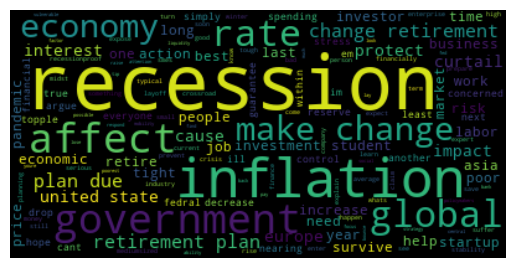

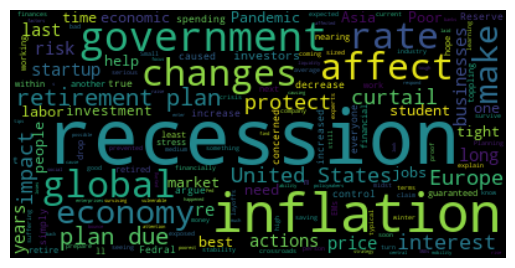

In [24]:
# word cloud of questions
create_wordcloud(df_cleaned, 'Question_cleaned')

create_wordcloud(df_cleaned, 'Question')

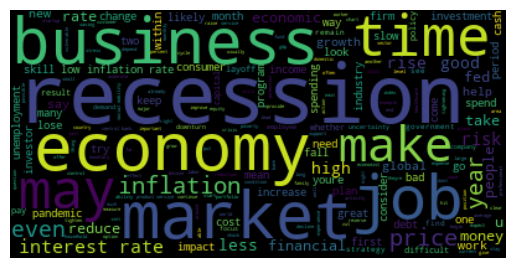

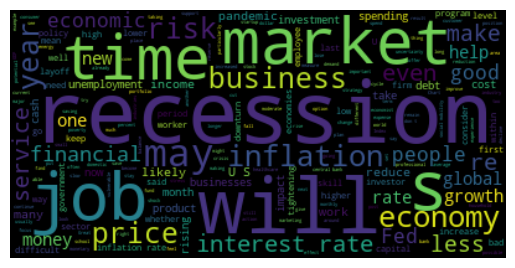

In [25]:
# word cloud of questions
create_wordcloud(df_cleaned, 'Answer_cleaned')
create_wordcloud(df_cleaned, 'Answer')

# There is a difference between cleaned and original answers

### Most common words

In [26]:
def all_stopwords(stopwords_list):
    ''' return list of all the stopwords including common stop words in english and stopwords list by the user
    '''
    stopwords = nltk.corpus.stopwords.words('english')
    # extend the default stopwords list by adding additional stopwords
    stopwords.extend(stopwords_list)
    return stopwords

In [27]:
def get_filtered_tokens(df, column_name, stopwords_list):
    ''' tokenize the elements of column of dataframe
    '''
    words_list = df[column_name].tolist()
    stop_words = all_stopwords(stopwords_list)
    tokens = [word_tokenize(i) for i in words_list]
    #error
    filtered_tokens = [word for word in tokens if word not in stop_words]
    filtered_tokens = [word for word in filtered_tokens if len(word) > 5]
    return filtered_tokens

In [28]:
def most_common_words(filtered_tokens, num_common_words):
    filtered_tokens = list(itertools.chain(*filtered_tokens))
    fdist = nltk.FreqDist(filtered_tokens)
    common_words = fdist.most_common(num_common_words)
    return common_words

In [29]:
# can add list of additional stopwords depending on the dataset
stopwords = []

# how many most common words to find
num_common_words = 300

In [30]:
# Tokenization followed by filteration on the basis of stopwords i.e., get the tokens after removing the stopwords
filtered_tokens_answers = get_filtered_tokens(df_cleaned, 'Answer_cleaned', stopwords)

# list of most common words
common_words_answers = most_common_words(filtered_tokens_answers, num_common_words)
print(common_words_answers)

[('recession', 76), ('rate', 66), ('market', 51), ('economy', 47), ('job', 47), ('inflation', 44), ('business', 44), ('year', 39), ('time', 38), ('may', 35), ('make', 33), ('price', 31), ('interest', 29), ('even', 27), ('u', 26), ('financial', 26), ('would', 25), ('risk', 25), ('rise', 23), ('less', 23), ('high', 23), ('good', 23), ('service', 20), ('take', 20), ('also', 20), ('pandemic', 20), ('people', 20), ('reduce', 20), ('economic', 20), ('money', 19), ('fed', 19), ('global', 19), ('growth', 19), ('help', 18), ('work', 18), ('say', 18), ('cash', 17), ('social', 17), ('low', 16), ('bank', 16), ('likely', 16), ('one', 16), ('increase', 15), ('product', 15), ('many', 15), ('impact', 15), ('unemployment', 15), ('youre', 15), ('go', 15), ('keep', 15), ('two', 14), ('government', 14), ('investment', 14), ('month', 14), ('industry', 14), ('great', 13), ('last', 13), ('spend', 13), ('consumer', 13), ('spending', 13), ('bad', 13), ('crisis', 13), ('treasury', 13), ('look', 13), ('new', 13)

In [31]:
# Tokenization followed by filteration on the basis of stopwords i.e., get the tokens after removing the stopwords
filtered_tokens_questions = get_filtered_tokens(df_cleaned, 'Question_cleaned', stopwords)

# list of most common words
common_words_questions = most_common_words(filtered_tokens_questions, num_common_words)
print(common_words_questions)

[('inflation', 8), ('change', 5), ('government', 4), ('make', 4), ('retirement', 4), ('plan', 4), ('due', 4), ('recession', 4), ('rate', 3), ('united', 3), ('state', 3), ('would', 2), ('action', 2), ('curtail', 2), ('work', 2), ('impact', 2), ('year', 2), ('retire', 2), ('global', 2), ('interest', 2), ('europe', 2), ('affect', 2), ('asia', 2), ('cant', 1), ('simply', 1), ('control', 1), ('price', 1), ('argue', 1), ('increase', 1), ('spending', 1), ('decrease', 1), ('true', 1), ('fedral', 1), ('reserve', 1), ('guarantee', 1), ('could', 1), ('investment', 1), ('ill', 1), ('least', 1), ('another', 1), ('hope', 1), ('within', 1), ('next', 1), ('im', 1), ('financial', 1), ('stress', 1), ('risk', 1), ('topple', 1), ('em', 1), ('stability', 1), ('whats', 1), ('high', 1), ('survive', 1), ('startup', 1), ('midst', 1), ('serious', 1), ('economic', 1), ('crisis', 1), ('crossroad', 1), ('term', 1), ('save', 1), ('company', 1), ('money', 1), ('explain', 1), ('claim', 1), ('expert', 1), ('current', 

In [32]:
def find_ngrams(dataset, column_name, n):
    ''' Tokenize the text and find the N-grams
    ''' 
    text_list = dataset[column_name].tolist()
    tokens = [word_tokenize(a) for a in text_list]
    n_grams = [ngrams(t, n) for t in tokens]

    return n_grams

In [33]:
# N_grams in Answer
n_grams_answer = find_ngrams(df, 'Answer', 3)
for g in n_grams_answer:
    print(next(g))

('Inflation', 'is', 'the')
('Inflation', 'increases', 'the')
('There', 'are', 'two')
('Forty', 'years', 'ago')
('Government', 'spending', 'that')
('The', 'government', 'agency')
('The', 'Fed', 'certainly')
('Typically', ',', 'the')
('Price', 'declines', 'ca')
('The', 'answer', 'to')
('If', 'you', 'still')
('If', 'you', '’')
('If', 'you', '’')
('Financial', 'markets', 'are')
('The', 'trade-weighted', 'U.S.')
('So', 'far', ',')
('As', '2023', 'unfolds')
('There', 'is', 'little')
('The', 'average', 'modern-day')
('Far-reaching', 'job', 'losses')
('This', 'can', 'be')
('That', '’', 's')
('An', 'official', 'recession')
('In', 'order', 'to')
('A', 'recession', 'would')
('To', 'keep', 'your')
('Preparing', 'for', 'the')
('Here', 'are', 'few')
('During', 'recession', 'it')
('Alongside', 'the', 'recent')
('According', 'to', 'Glassdoor')
('We', 'are', 'turning')
('Depending', 'on', 'the')
('If', 'your', 'SME')
('Although', 'a', 'global')
('Advanced', 'economies', 'are')
('The', 'main', 'reasons'

In [34]:
# N_grams in Answer
n_grams = find_ngrams(df, 'Question', 3)
for g in n_grams:
    print(next(g))

('What', 'is', 'inflation')
('Why', 'is', 'everyone')
('What', 'has', 'caused')
('Can', '’', 't')
('Some', 'argue', 'increased')
('What', 'can', 'the')
('Are', 'the', 'actions')
('How', 'the', 'actions')
('How', 'long', 'until')
('Should', 'I', 'make')
('I', '’', 'll')
('I', 'hope', 'to')
('I', '’', 'm')
('Is', 'the', 'global')
('Does', 'financial', 'stress')
('How', 'exposed', 'is')
('Is', 'there', 'something')
('What', "'s", 'the')
('How', 'long', 'does')
('How', 'does', 'a')
('What', 'should', 'I')
('Is', 'a', 'recession')
('How', 'do', 'we')
('What', 'is', 'Recession')
('How', 'recession', 'affects')
('How', 'to', 'financially')
('How', 'to', 'survive')
('Which', 'industry', 'is')
('What', 'do', 'businesses')
('Why', 'are', 'we')
('How', 'to', 'explain')
('What', 'could', 'have')
('Where', 'can', 'people')
('How', 'to', 'prepare')
('What', 'is', 'a')
('Is', 'the', 'United')
('What', 'is', 'causing')
('How', 'would', 'a')
('How', 'should', 'policymakers')
('How', 'has', 'the')
('Wha

## Text length

In [35]:
def text_length(dataset, column_name):
    ''' calculate the average length of words in the text eg: Answers
    by taking the sum of the lengths of all the answers in the dataset, divided by the total number of answers
    '''
    text_list = dataset[column_name].tolist()
    tokens = [word_tokenize(t) for t in text_list]
    lengths = [len(t) for t in tokens]
    avg_length = round(sum(lengths) / len(lengths))
    max_length = max(lengths)
    min_length = min(lengths)
    return avg_length, max_length, min_length

In [36]:
avg_length_questions, max_length_questions, min_length_questions = text_length(df, 'Question')
print('Average length of questions is:', avg_length_questions)
print(f'Maximum and minimum length of questions is {max_length_questions} and {min_length_questions}')

Average length of questions is: 11
Maximum and minimum length of questions is 32 and 4


In [37]:
avg_length_answers, max_length_answers, min_length_answers = text_length(df, 'Answer')
print('Average length of answers is:', avg_length_answers)
print(f'Maximum and minimum length of answers is {max_length_answers} and {min_length_answers}')

Average length of answers is: 196
Maximum and minimum length of answers is 742 and 21


## Vocab size

In [38]:
def calculate_vocab_size(dataset, column_name):
    ''' calculate the vocabulary size
    '''
    text_list = dataset[column_name].tolist()
    tokens = [word_tokenize(t) for t in text_list]
    vocab = set([word for t in tokens for word in t])
    vocab_size = len(vocab)
    print(vocab_size)

In [39]:
# without stopwords
vocab_size_questions = calculate_vocab_size(df_cleaned, 'Question')
vocab_size_answers = calculate_vocab_size(df_cleaned, 'Answer')

242
2544
